In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('./shampoo_final.csv')
df['긍정부정'] = df['긍정부정'].replace({'y': 1, 'n': 0})

print(df.shape)
df.head()

(10279, 4)


,리뷰,평점,긍정부정,리뷰길이
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,0,52
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,0,50
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,0,40
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,0,27
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,0,510


In [2]:
# 모델
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  df['리뷰'], df['긍정부정'],
  stratify=df['긍정부정'],
  test_size=.25)

In [3]:
print("Train Size: ", len(X_train))
print("Test Size: ", len(X_test))

Train Size:  7709
Test Size:  2570


#### 1. 명사/동사/형용사

In [4]:
# 토크나이저 정의
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

t = Okt()

def tokenizer1(txt):
  result = []
  for word, tag in t.pos(txt, norm=True, stem=True):
    if tag in ['Noun', 'Verb', 'Adjective']:
      result.append(word)
  return result

tfidf1 = TfidfVectorizer(
  tokenizer=tokenizer1, max_features=1000,
  min_df=5, max_df=.5)

X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1 = tfidf1.transform(X_test)

/Users/jason/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV

# params = {
#   'penalty': ['l1', 'l2', 'elasticnet'],
#   'C': np.logspace(-4, 4, 20),
#   'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
#   'max_iter': [100, 1000, 2500, 5000]
# }

# lr_clf = LogisticRegression(random_state=13)

# gs_cv = GridSearchCV(lr_clf, param_grid=params, n_jobs=-1)

In [6]:
# gs_cv.fit(X_train_tfidf1, y_train)

In [7]:
# gs_cv.best_estimator_

In [8]:
# gs_cv.best_params_

In [9]:
# gs_cv.score(X_test_tfidf1, y_test)

In [10]:
models = []

models.append(('RandomForestClassifier', RandomForestClassifier(
  n_jobs=-1, random_state=7)))

models.append(('GradientBoostingClassifier', GradientBoostingClassifier(
  n_estimators=100, random_state=7)))

models.append(('AdaBoostClassifier', AdaBoostClassifier(
  n_estimators=100, random_state=7)))

models.append(('DecisionTreeClassifier', DecisionTreeClassifier(
  max_depth=4, random_state=7)))

models.append(('LogisticRegression', LogisticRegression(
  random_state=7)))

models.append(('SupportVectorClassifier', SVC(
  random_state=7)))

# models.append(('NaiveBayes', GaussianNB()))

In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []; names = []
for name, model in models:
  splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train_tfidf1, y_train, cv=splitter, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  
  print(cv_results)
  print(name, cv_results.mean())
  print('=' * 150)

[0.84306096 0.81841764 0.84111543 0.85084306 0.85074627]
RandomForestClassifier 0.8408366726677894
[0.81387808 0.7846952  0.80415045 0.80869001 0.83257625]
GradientBoostingClassifier 0.8087979995135136
[0.80998703 0.80155642 0.8080415  0.807393   0.82673589]
AdaBoostClassifier 0.8107427673003617
[0.67963684 0.67574578 0.60894942 0.68028534 0.6807268 ]
DecisionTreeClassifier 0.6650688361609312
[0.84241245 0.81906615 0.8385214  0.84046693 0.85074627]
LogisticRegression 0.838242638945351
[0.8618677  0.83916991 0.85278859 0.85538262 0.86826736]
SupportVectorClassifier 0.8554952357145081


In [12]:
results

[array([0.84306096, 0.81841764, 0.84111543, 0.85084306, 0.85074627]),
 array([0.81387808, 0.7846952 , 0.80415045, 0.80869001, 0.83257625]),
 array([0.80998703, 0.80155642, 0.8080415 , 0.807393  , 0.82673589]),
 array([0.67963684, 0.67574578, 0.60894942, 0.68028534, 0.6807268 ]),
 array([0.84241245, 0.81906615, 0.8385214 , 0.84046693, 0.85074627]),
 array([0.8618677 , 0.83916991, 0.85278859, 0.85538262, 0.86826736])]

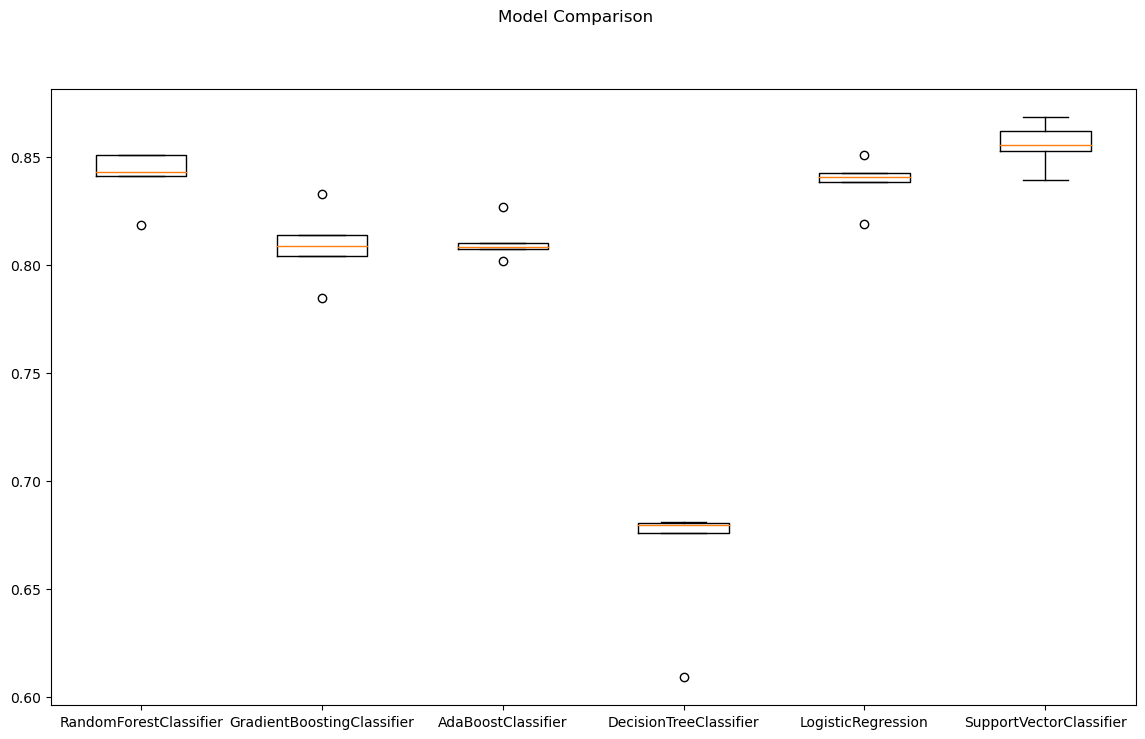

In [13]:
fig = plt.figure(figsize=(14, 8))

fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names);

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for name, model in models:
  model.fit(X_train_tfidf1, y_train)
  pred = model.predict(X_test_tfidf1)
  
  print(name, accuracy_score(y_test, pred))
  print(name, precision_score(y_test, pred))
  print(name, recall_score(y_test, pred))
  print(name, f1_score(y_test, pred))
  print('=' * 150)

RandomForestClassifier 0.8299610894941635
RandomForestClassifier 0.8412600370599135
RandomForestClassifier 0.8832684824902723
RandomForestClassifier 0.8617526099335654
GradientBoostingClassifier 0.7926070038910505
GradientBoostingClassifier 0.7907780979827089
GradientBoostingClassifier 0.8897535667963683
GradientBoostingClassifier 0.8373512358864814
AdaBoostClassifier 0.8027237354085603
AdaBoostClassifier 0.845691382765531
AdaBoostClassifier 0.8210116731517509
AdaBoostClassifier 0.8331688055281342
DecisionTreeClassifier 0.6782101167315175
DecisionTreeClassifier 0.6646706586826348
DecisionTreeClassifier 0.9357976653696498
DecisionTreeClassifier 0.7772690546727713
LogisticRegression 0.8385214007782101
LogisticRegression 0.8519675202998126
LogisticRegression 0.8845654993514915
LogisticRegression 0.8679605472478523
SupportVectorClassifier 0.8591439688715953
SupportVectorClassifier 0.8720050441361917
SupportVectorClassifier 0.896887159533074
SupportVectorClassifier 0.8842710997442456


#### 2. 명사/동사

In [15]:
def tokenizer2(txt):
  result = []
  for word, tag in t.pos(txt, norm=True, stem=True):
    if tag in ['Noun', 'Verb']:
      result.append(word)
  return result

tfidf2 = TfidfVectorizer(
  tokenizer=tokenizer2, max_features=2000,
  min_df=5, max_df=.5)

X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2 = tfidf2.transform(X_test)

/Users/jason/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
models = []

models.append(('RandomForestClassifier', RandomForestClassifier(
  n_jobs=-1, random_state=7)))

models.append(('GradientBoostingClassifier', GradientBoostingClassifier(
  n_estimators=100, random_state=7)))

models.append(('AdaBoostClassifier', AdaBoostClassifier(
  n_estimators=100, random_state=7)))

models.append(('DecisionTreeClassifier', DecisionTreeClassifier(
  max_depth=4, random_state=7)))

models.append(('LogisticRegression', LogisticRegression(
  random_state=7)))

models.append(('SupportVectorClassifier', SVC(
  random_state=7)))

In [17]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []; names = []
for name, model in models:
  splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train_tfidf1, y_train, cv=splitter, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  
  print(cv_results)
  print(name, cv_results.mean())
  print('=' * 150)

[0.84306096 0.81841764 0.84111543 0.85084306 0.85074627]
RandomForestClassifier 0.8408366726677894
[0.81387808 0.7846952  0.80415045 0.80869001 0.83257625]
GradientBoostingClassifier 0.8087979995135136
[0.80998703 0.80155642 0.8080415  0.807393   0.82673589]
AdaBoostClassifier 0.8107427673003617
[0.67963684 0.67574578 0.60894942 0.68028534 0.6807268 ]
DecisionTreeClassifier 0.6650688361609312
[0.84241245 0.81906615 0.8385214  0.84046693 0.85074627]
LogisticRegression 0.838242638945351
[0.8618677  0.83916991 0.85278859 0.85538262 0.86826736]
SupportVectorClassifier 0.8554952357145081


In [18]:
results

[array([0.84306096, 0.81841764, 0.84111543, 0.85084306, 0.85074627]),
 array([0.81387808, 0.7846952 , 0.80415045, 0.80869001, 0.83257625]),
 array([0.80998703, 0.80155642, 0.8080415 , 0.807393  , 0.82673589]),
 array([0.67963684, 0.67574578, 0.60894942, 0.68028534, 0.6807268 ]),
 array([0.84241245, 0.81906615, 0.8385214 , 0.84046693, 0.85074627]),
 array([0.8618677 , 0.83916991, 0.85278859, 0.85538262, 0.86826736])]

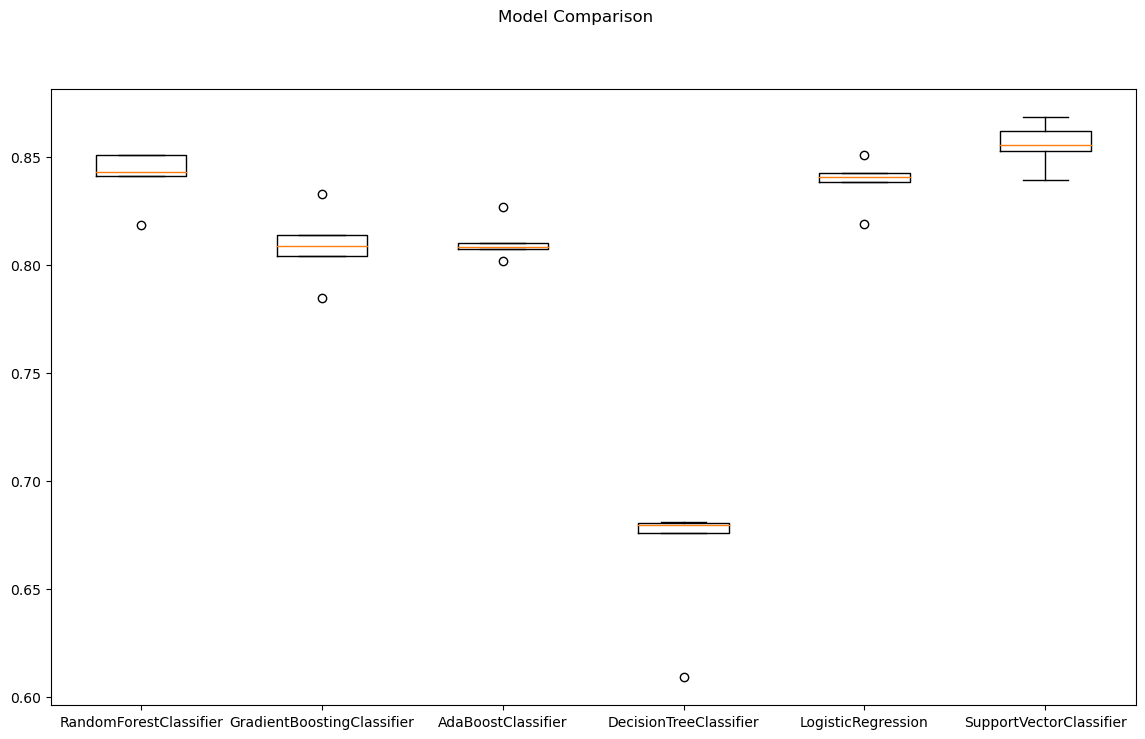

In [19]:
fig = plt.figure(figsize=(14, 8))

fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names);

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for name, model in models:
  model.fit(X_train_tfidf1, y_train)
  pred = model.predict(X_test_tfidf1)
  
  print(name, accuracy_score(y_test, pred))
  # print(name, precision_score(y_test, pred))
  # print(name, recall_score(y_test, pred))
  # print(name, f1_score(y_test, pred))
  # print('=' * 150)

RandomForestClassifier 0.8299610894941635
GradientBoostingClassifier 0.7926070038910505
AdaBoostClassifier 0.8027237354085603
DecisionTreeClassifier 0.6782101167315175
LogisticRegression 0.8385214007782101
SupportVectorClassifier 0.8591439688715953


#### 3. 명사/형용사

In [21]:
def tokenizer3(txt):
  result = []
  for word, tag in t.pos(txt, norm=True, stem=True):
    if tag in ['Noun', 'Adjective']:
      result.append(word)
  return result

tfidf3 = TfidfVectorizer(
  tokenizer=tokenizer3, max_features=2000,
  min_df=5, max_df=.5)

X_train_tfidf3 = tfidf3.fit_transform(X_train)
X_test_tfidf3 = tfidf3.transform(X_test)

/Users/jason/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
models = []

models.append(('RandomForestClassifier', RandomForestClassifier(
  n_jobs=-1, random_state=7)))

models.append(('GradientBoostingClassifier', GradientBoostingClassifier(
  n_estimators=100, random_state=7)))

models.append(('AdaBoostClassifier', AdaBoostClassifier(
  n_estimators=100, random_state=7)))

models.append(('DecisionTreeClassifier', DecisionTreeClassifier(
  max_depth=4, random_state=7)))

models.append(('LogisticRegression', LogisticRegression(
  random_state=7)))

models.append(('SupportVectorClassifier', SVC(
  random_state=7)))

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []; names = []
for name, model in models:
  splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X_train_tfidf1, y_train, cv=splitter, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  
  print(cv_results)
  print(name, cv_results.mean())
  print('=' * 150)

[0.84306096 0.81841764 0.84111543 0.85084306 0.85074627]
RandomForestClassifier 0.8408366726677894
[0.81387808 0.7846952  0.80415045 0.80869001 0.83257625]
GradientBoostingClassifier 0.8087979995135136
[0.80998703 0.80155642 0.8080415  0.807393   0.82673589]
AdaBoostClassifier 0.8107427673003617
[0.67963684 0.67574578 0.60894942 0.68028534 0.6807268 ]
DecisionTreeClassifier 0.6650688361609312
[0.84241245 0.81906615 0.8385214  0.84046693 0.85074627]
LogisticRegression 0.838242638945351
[0.8618677  0.83916991 0.85278859 0.85538262 0.86826736]
SupportVectorClassifier 0.8554952357145081


In [24]:
results

[array([0.84306096, 0.81841764, 0.84111543, 0.85084306, 0.85074627]),
 array([0.81387808, 0.7846952 , 0.80415045, 0.80869001, 0.83257625]),
 array([0.80998703, 0.80155642, 0.8080415 , 0.807393  , 0.82673589]),
 array([0.67963684, 0.67574578, 0.60894942, 0.68028534, 0.6807268 ]),
 array([0.84241245, 0.81906615, 0.8385214 , 0.84046693, 0.85074627]),
 array([0.8618677 , 0.83916991, 0.85278859, 0.85538262, 0.86826736])]

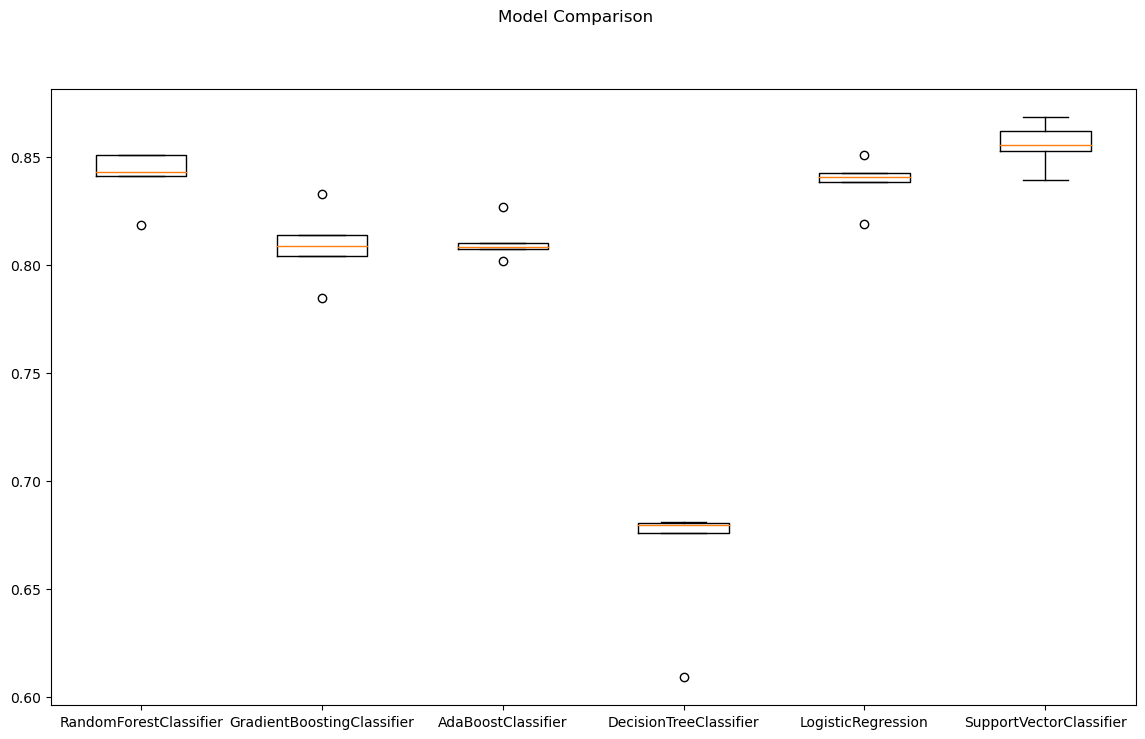

In [25]:
fig = plt.figure(figsize=(14, 8))

fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names);

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for name, model in models:
  model.fit(X_train_tfidf1, y_train)
  pred = model.predict(X_test_tfidf1)
  
  print(name, accuracy_score(y_test, pred))
  # print(name, precision_score(y_test, pred))
  # print(name, recall_score(y_test, pred))
  # print(name, f1_score(y_test, pred))
  # print('=' * 150)

RandomForestClassifier 0.8299610894941635
GradientBoostingClassifier 0.7926070038910505
AdaBoostClassifier 0.8027237354085603
DecisionTreeClassifier 0.6782101167315175
LogisticRegression 0.8385214007782101
SupportVectorClassifier 0.8591439688715953
